In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [2]:
E_commerce_data = pd.read_csv("C:\\Users\\User\\Documents\\PDS_PROJ_PIC\\ECOMMERCE.csv")

In [3]:
E_commerce_data = E_commerce_data.rename({"Highest Educational Qualification":"Qualification",
                                         "On a scale of 0-5 how much will you rate the customer service(Delivery process , after sale service, return policy)":"C_service"}, axis = 1)

In [4]:
data = pd.DataFrame(columns=["Age","subscription","Subscription"])

In [5]:
data.subscription = E_commerce_data.Gender
data.Subscription = E_commerce_data["Do you have any subscription on any E-Commerce site?"]
data.Age = E_commerce_data.Age

In [6]:
data1 = data.groupby(["Age","Subscription"]).count(); data1

subscription
Age Subscription              
16  No                       2
    Yes                      1
17  No                       3
    Yes                      1
18  No                       1
    Yes                      2
19  No                       1
    Yes                      1
20  No                      10
    Yes                      4
21  No                      25
    Yes                     18
22  No                       9
    Yes                     11
23  No                       7
    Yes                     10
24  No                       2
    Yes                      1
26  No                       1
34  No                       1
    Yes                      1

In [7]:
data2 = pd.DataFrame(columns=["Age","subscription"])
row_list = []
for i,j in data1.index:
    dict1 = {}
    dict1.update({"Age": i, "Subscription":j})
    row_list.append(dict1)
df1 = pd.DataFrame(row_list); df1    

,Age,Subscription
0,16,No
1,16,Yes
2,17,No
3,17,Yes
4,18,No
5,18,Yes
6,19,No
7,19,Yes
8,20,No
9,20,Yes


In [8]:
df1["total_subscription"] = list(data1.subscription)

In [9]:
df1

,Age,Subscription,total_subscription
0,16,No,2
1,16,Yes,1
2,17,No,3
3,17,Yes,1
4,18,No,1
5,18,Yes,2
6,19,No,1
7,19,Yes,1
8,20,No,10
9,20,Yes,4


In [10]:
df1["Avg_total_subscription"] = df1.groupby("Age").transform(lambda x: (x*100)/x.sum())

In [11]:
df1

,Age,Subscription,total_subscription,Avg_total_subscription
0,16,No,2,66.666667
1,16,Yes,1,33.333333
2,17,No,3,75.000000
3,17,Yes,1,25.000000
4,18,No,1,33.333333
5,18,Yes,2,66.666667
6,19,No,1,50.000000
7,19,Yes,1,50.000000
8,20,No,10,71.428571
9,20,Yes,4,28.571429


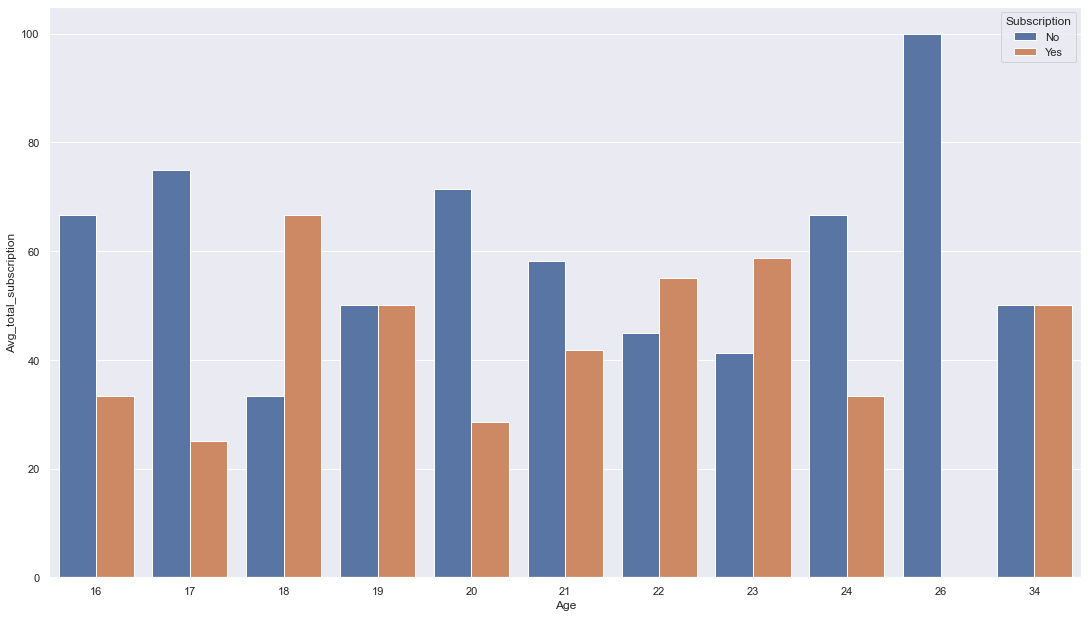

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5,10.5, forward = True)
sns.barplot(x = 'Age', y = 'Avg_total_subscription',
           data = df1,
           hue = 'Subscription')
fig.savefig('4(a).png',facecolor='lightgrey',transparent=True)